# Trabajo Practico Métodos Numéricos

**Grupo 17** - Integrantes:
- Aguirre, Camilo
- Bianciotto, Joaquín
- Petraccaro, Maximiliano

# **Parte 1**: Derivación Numérica

In [10]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
x = sympy.symbols("x")

**METODOS DE DERIVACIONES**

*Diferencias hacias adelante*

In [2]:
def DifAdelante(funcion, paso, a, valorReal):
    tabla = []
    for i in range(3):  # Ajustar el rango para que comience desde 0
        tabla.append(funcion.subs(x, a + (i * paso)))

    Dif1 = (tabla[1] - tabla[0]) / paso
    Error1R = (valorReal - tabla[1]) / valorReal
    Dif2 = (-tabla[2] + 4 * tabla[1] - 3 * tabla[0]) / (2 * paso)
    Error2R = (valorReal - tabla[2]) / valorReal
    
    print('Diferencia 1 hacia adelante: ', Dif1)
    print('Error relativo de la 1 diferencia: ', Error1R, ' y porcentual: ', Error1R * 100, '%')
    print('Diferencia 2 hacia adelante: ', Dif2)
    print('Error relativo de la 2 diferencia: ', Error2R, ' y porcentual: ', Error2R * 100, '%')
    
    graficar_errores([paso,Error1R, Error2R], ["Error relativo (1ª diferencia)", "Error relativo (2ª diferencia)"],"Error relativo hacia adelante")

*Diferencias hacia atras*

In [3]:
def DifAtras(funcion,paso,a, valorReal):
    tabla = []
    for i in range(3):  # Ajustar el rango para que comience desde 0
        tabla.append(funcion.subs(x, a - (i * paso)))
        
    Dif1 = (tabla[0] - tabla[1]) / paso
    Error1R = (valorReal - tabla[1]) / valorReal
    Dif2 = (3 * tabla[0] - 4 * tabla[1] + tabla[2]) / (2 * paso)
    Error2R = (valorReal - tabla[2]) / valorReal
    
    print('Diferencia 1 hacia atras: ', Dif1)
    print('Error relativo de la 1 diferencia: ', Error1R, ' y porcentual: ', Error1R * 100, '%')
    print('Diferencia 2 hacia atras: ', Dif2)
    print('Error relativo de la 2 diferencia: ', Error2R, ' y porcentual: ', Error2R * 100, '%')
    
    graficar_errores([paso,Error1R, Error2R], ["Error relativo (1ª diferencia)", "Error relativo (2ª diferencia)"],"Error relativo hacia atras")

*Diferencias Centrales*

In [4]:
def DifCentrales(funcion,paso,a,valorReal):
    tablaAdelante = []
    tablaAtras = []
    for i in range(3):  # Ajustar el rango para que comience desde 0
        tablaAdelante.append(funcion.subs(x, a + (i * paso)))
        tablaAtras.append(funcion.subs(x, a - (i * paso)))
    
    Dif1 = (tablaAdelante[1] - tablaAtras[1]) / (2 * paso)
    Error1R = (valorReal - tablaAdelante[1]) / valorReal
    Dif2 = (-tablaAdelante[2]+8*tablaAdelante[1]-8*tablaAtras[1]+tablaAtras[2]) / (12 * paso)
    Error2R = (valorReal - tablaAdelante[2]) / valorReal
    
    print('Diferencia 1 centrales: ', Dif1)
    print('Error relativo de la 1 diferencia: ', Error1R, ' y porcentual: ', Error1R * 100, '%')
    print('Diferencia 2 centrales: ', Dif2)
    print('Error relativo de la 2 diferencia: ', Error2R, ' y porcentual: ', Error2R * 100, '%')
    
    graficar_errores([paso,Error1R, Error2R], ["Error relativo (1ª diferencia)", "Error relativo (2ª diferencia)"],"Error relativo centrales")

**GRAFICA DE ERRORES**

In [5]:


def graficar_errores(e, etiquetas="", titulo=""):
    
    h_values = e[0]
    error1_values = e[1]
    error2_values = e[2]

    # Graficar errores relativos
    plt.figure(figsize=(10, 6))
    plt.plot(h_values, error1_values, label=etiquetas[0], marker='o', linestyle='-')
    plt.plot(h_values, error2_values, label=etiquetas[1], marker='s', linestyle='--')
    plt.xscale('log')  # Escala logarítmica para h
    plt.yscale('log')  # Escala logarítmica para el error
    plt.xlabel("Paso (h)")
    plt.ylabel("Error Relativo")
    plt.title(titulo)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.show()




In [6]:
funcion = (((3*x-1)/(x**2+3))**2)
h =  0.1
ValorReal = 1/2

Metodo diferencia hacia adelante
Diferencia 1 hacia adelante:  0.484636737549439
Error relativo de la 1 diferencia:  0.403072652490112  y porcentual:  40.3072652490112 %
Diferencia 2 hacia adelante:  0.504721084870813
Error relativo de la 2 diferencia:  0.314179043908774  y porcentual:  31.4179043908774 %


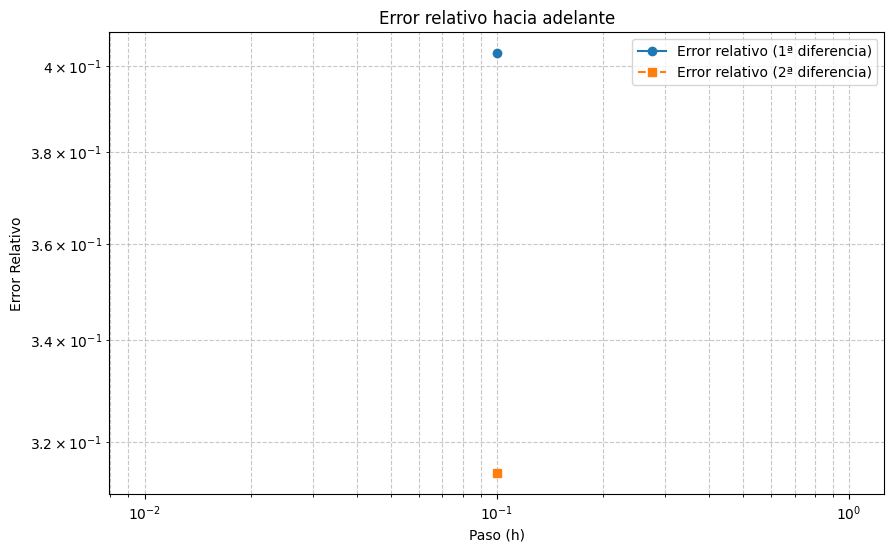

In [7]:
#metodo diferencia hacia adelante
print("Metodo diferencia hacia adelante")
DifAdelante(funcion,h,1,ValorReal)

Metodo diferencia hacia atras
Diferencia 1 hacia atras:  0.509107129325370
Error relativo de la 1 diferencia:  0.601821425865074  y porcentual:  60.1821425865074 %
Diferencia 2 hacia atras:  0.507859229064941
Error relativo de la 2 diferencia:  0.704142011834319  y porcentual:  70.4142011834319 %


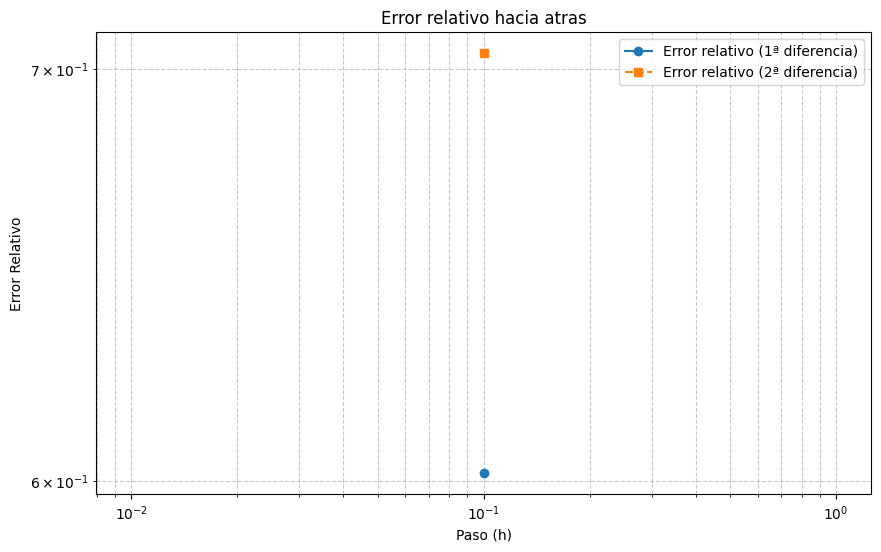

In [8]:
#metodo diferencia hacia atras
print("Metodo diferencia hacia atras")
DifAtras(funcion,h,1,ValorReal)

Metodo diferencias centrales
Diferencia 1 centrales:  0.496871933437404
Error relativo de la 1 diferencia:  0.403072652490112  y porcentual:  40.3072652490112 %
Diferencia 2 centrales:  0.500011341280895
Error relativo de la 2 diferencia:  0.314179043908774  y porcentual:  31.4179043908774 %


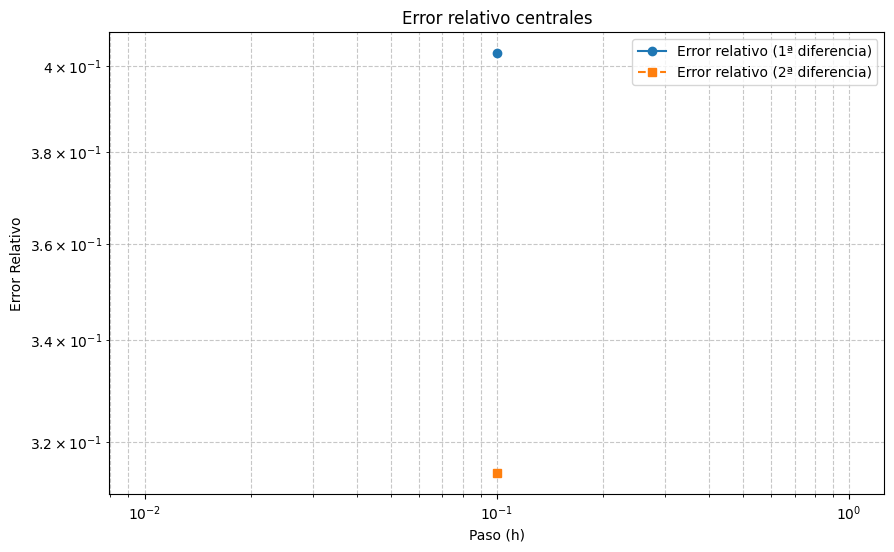

In [9]:
#metodo diferencias centrales
print("Metodo diferencias centrales")
DifCentrales(funcion,h,1,ValorReal)

# **Parte 2:** Integración Numérica

## Aclaraciones
En los 3 metodos se utilizará una lista que contiene, en cada espacio, un arreglo de 2 elementos: El primero es x y el segundo f(x)=y.
Para llenar esta lista utilizaremos **numpy**, la cual nos provee de **arange**, el cual es una alternativa al "in range" nativo de python, pero que permite la flexibilidad de realizar pasos no enteros.  
**numpy** tambien nos provee una herramienta util para simpson 38, que es "linespace", la cual genera un numero especifico de valores equidistantes dentro de un intervalo.

In [11]:
def trapecios(fun,paso,a,b):
    tabla = []
    A = 0
    for i in np.arange(a,b+paso,paso):
        tabla.append([int(i),fun.subs(x,i)])
    for i in range(1,len(tabla)-1): #sumatoria de los elementos medios de la tabla
        A += tabla[i][1]
    A *= 2  
    A = A + tabla[0][1] + tabla[-1][1] #Sumo elementos extremos
    A = A * (paso/2)    #multiplico por h/2 
    return A    #devuelvo la aproximacion de la integral

In [12]:
def simpson13(fun,paso,a,b):
    if ((b-a)/paso) % 2 != 0: #para simpson13 con segmentos multiples, n debe ser par
        return "Error, el numero de intervalos debe ser par para simposon 1/3"
    tabla = []
    #defino las variables a utilizar
    E =0
    I=0
    P=0
    A=0
    for i in np.arange(a,b+paso,paso):
        tabla.append([int(i),fun.subs(x,i)])
    E= tabla[0][1] + tabla[-1][1]   #sumo los elementos extremos
    for i in range(1,len(tabla)-1):
        if (i % 2 == 0):
            P += tabla[i][1]    #sumo elementos pares
        else:
            I += tabla[i][1]    #sumo elementos impares
    A = (paso/3)*(E+4*I+2*P)    #aplico la formula de simpson 1/3
    return A    #devuelvo la aproximacion de la integral

In [13]:
def simpson38(fun,paso,a, b):
    tabla = []
    paso = (b - a) / 3  #Redefino h
    A = 0
    x_values = np.linspace(a, b, 4)
    
    #Lleno la tabla con los valores de la funcion evaluados en los puntos dados por el linespace
    for i in range(4):
        tabla.append([x_values[i], fun.subs(x, x_values[i])])
    
    #Aplico la formula de simpson 3/8
    A = (3/8) * paso * (tabla[0][1] + 3 * tabla[1][1] + 3 * tabla[2][1] + tabla[3][1])
    #Devuelvo la aproximacion de la integral
    return A
   

In [14]:
#función para calcular errores de una integral
def errores(a,b):
    errores = []
    errores.append(abs(a-b))
    errores.append(abs((a-b)/b))
    errores.append(abs((a-b)/b)*100)

    return errores

In [16]:
#funcion para aproximar una integral
#recibe el metodo a utilizar, la funcion a integrar, los limites de integracion, el paso y el valor real de la integral
#si no se conoce el valor real de la integral, se puede dejar en None
def aproximar(metodo,fun, a, b, paso, integrable = None):
    aproximacion = metodo(fun, paso, a, b)
    if type(aproximacion) == str: return aproximacion
    if (integrable == None):
        integral = sympy.integrate(fun, x)
        integral = integral.subs(x, b) - integral.subs(x, a)
    else:
        integral = integrable
    error = errores(aproximacion, integral)
    #Muestro los errores
    print (f"Aproximacion mediante {metodo.__name__}: ", aproximacion)
    print (f"Valor real de la integral: ", integral)
    print (f"Errores: ")
    print (f"Error absoluto: ", round(error[0],4))
    print (f"Error relativo: ", round(error[1],4))
    print (f"Error porcentual: ", round(error[2],4))

In [15]:
#definir Funciones y varibales
#si el programa tarda mucho es porque la funcion es muy compleja
#En ese caso definir "valorReal" como el valor de la integral de la funcion en [a,b]

#La funcion dada por la profesora tarda mucho en calcularse
#Por lo tanto se obtuvo el valor de una app que calcula integrales
funcion = (x**3)/(1+x**0.5)
a = 1
b = 2
paso = 0.25
valorReal = 1.647107951640862

In [17]:
#metodo trapecios
aproximar(trapecios,funcion,a,b,paso,valorReal)

Aproximacion mediante trapecios:  1.66330957257967
Valor real de la integral:  1.647107951640862
Errores: 
Error absoluto:  0.0162
Error relativo:  0.0098
Error porcentual:  0.9836


In [18]:
#metodo simpson 1/3
aproximar(simpson13,funcion,a,b,paso,valorReal)

Aproximacion mediante simpson13:  1.64709907487529
Valor real de la integral:  1.647107951640862
Errores: 
Error absoluto:  0.0
Error relativo:  0.0
Error porcentual:  0.0005


In [19]:
#metodo simpson 3/8
aproximar(simpson38,funcion,a,b,paso,valorReal)

Aproximacion mediante simpson38:  1.64704637496726
Valor real de la integral:  1.647107951640862
Errores: 
Error absoluto:  0.0001
Error relativo:  0.0
Error porcentual:  0.0037


# **Parte 3:** Resolución de Ecuaciones Diferenciales Ordinarias

In [21]:
import sympy as sp

In [23]:
def euler_method(f, x0, y0, h, x_end):
    """
    Método de Euler para resolver ecuaciones diferenciales ordinarias.
    :param f: función de la ecuación diferencial dy/dx = f(x, y)
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param h: tamaño del paso
    :param x_end: valor de x hasta donde calcular
    :return: aproximación de y en x_end
    """
    x = x0
    y = y0

    # Imprimimos el encabezado de la tabla
    print(f"{'x':^10} {'y':^10} {'f(x, y)':^10} {'y_exact':^12} {'Error Rel.':^12} {'Error %':^10}")
    print("-" * 70)

    while x < x_end:
        y_exact = solucion_analitica(x)  # Solución analítica en x
        fx_y = f(x, y)  # Calculamos f(x, y)
        
        # Cálculo de errores
        error_relativo = abs(y_exact - y) / abs(y_exact)
        error_porcentual = error_relativo * 100

        # Imprimir fila con los valores redondeados a 4 decimales
        print(f"{x:<10.2f} {float(y):<10.4f} {float(fx_y):<10.4f} {float(y_exact):<12.4f} {float(error_relativo):<12.4f} {float(error_porcentual):<10.2f}")
        
        y += h * fx_y  # Aplicamos la fórmula de Euler
        x += h

    # Agregar el último punto
    y_exact = solucion_analitica(x)
    fx_y = f(x, y)
    error_relativo = abs(y_exact - y) / abs(y_exact)
    error_porcentual = error_relativo * 100
    print(f"{x:<10.2f} {float(y):<10.4f} {float(fx_y):<10.4f} {float(y_exact):<12.4f} {float(error_relativo):<12.4f} {float(error_porcentual):<10.2f}")

    return y

In [24]:
def improved_euler_method(f, x0, y0, h, x_end):
    """
    Método de Euler Mejorado para resolver ecuaciones diferenciales ordinarias.
    :param f: función de la ecuación diferencial dy/dx = f(x, y)
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param h: tamaño del paso
    :param x_end: valor de x hasta donde calcular
    :return: aproximación de y en x_end
    """
    x = x0
    y = y0

    # Imprimimos el encabezado de la tabla
    print(f"{'x':^10} {'y':^10} {'Zi':^10} {'f(x, y)':^12} {'f(x+1, Zi)':^14} {'y_exact':^12} {'Error Rel.':^12} {'Error %':^10}")
    print("-" * 90)

    while x < x_end:
        y_exact = solucion_analitica(x)  # Solución analítica en x
        fx_y = f(x, y)  # Calculamos f(x, y)
        zi = y + h * fx_y  # Calculamos zi
        fx_z = f(x + h, zi)  # Calculamos f(x + h, zi)
        y_new = y + (h / 2) * (fx_y + fx_z)  # Aplicamos la fórmula de Euler Mejorado
        
        # Cálculo de errores
        error_relativo = abs(y_exact - y) / abs(y_exact)
        error_porcentual = error_relativo * 100

        # Imprimir fila con los valores redondeados a 4 decimales
        print(f"{x:<10.2f} {float(y):<10.4f} {float(zi):<10.4f} {float(fx_y):<12.4f} {float(fx_z):<14.4f} {float(y_exact):<12.4f} {float(error_relativo):<12.4f} {float(error_porcentual):<10.2f}")

        y = y_new  # Actualizamos y al nuevo valor
        x += h

    # Último punto
    y_exact = solucion_analitica(x)
    fx_y = f(x, y)
    zi = y + h * fx_y
    fx_z = f(x + h, zi)
    y_new = y + (h / 2) * (fx_y + fx_z)
    error_relativo = abs(y_exact - y) / abs(y_exact)
    error_porcentual = error_relativo * 100

    print(f"{x:<10.2f} {float(y):<10.4f} {float(zi):<10.4f} {float(fx_y):<12.4f} {float(fx_z):<14.4f} {float(y_exact):<12.4f} {float(error_relativo):<12.4f} {float(error_porcentual):<10.2f}")

    return y

In [25]:
def rk4(f, x0, y0, h, x_end):
    """
    Método de Runge-Kutta de orden 4 (RK4) para resolver ecuaciones diferenciales ordinarias.
    :param f: función de la ecuación diferencial dy/dx = f(x, y)
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param h: tamaño del paso
    :param x_end: valor de x hasta donde calcular
    :return: aproximación de y en x_end
    """
    x = x0
    y = y0

    # Imprimimos el encabezado de la tabla
    print(f"{'x':^10} {'y':^10} {'pi':^10} {'qi':^10} {'ri':^10} {'si':^10} {'y_exact':^12} {'Error Rel.':^12} {'Error %':^10}")
    print("-" * 110)

    while x < x_end:
        pi = f(x, y) * h  # Calculamos pi
        qi = f(x + h/2, y + pi/2) * h  # Calculamos qi
        ri = f(x + h/2, y + qi/2) * h  # Calculamos ri
        si = f(x + h, y + ri) * h  # Calculamos si
        
        y_new = y + (1/6) * (pi + 2*qi + 2*ri + si)  # Aplicamos la fórmula de RK4
        
        y_exact = solucion_analitica(x)  # Solución analítica en x
        error_relativo = abs(y_exact - y) / abs(y_exact)
        error_porcentual = error_relativo * 100

        # Imprimir fila con los valores redondeados a 4 decimales
        print(f"{x:<10.2f} {float(y):<10.4f} {float(pi):<10.4f} {float(qi):<10.4f} {float(ri):<10.4f} {float(si):<10.4f} {float(y_exact):<12.4f} {float(error_relativo):<12.4f} {float(error_porcentual):<10.2f}")

        y = y_new  # Actualizamos y al nuevo valor
        x += h

    # Último punto
    pi = f(x, y) * h
    qi = f(x + h/2, y + pi/2) * h
    ri = f(x + h/2, y + qi/2) * h
    si = f(x + h, y + ri) * h
    y_new = y + (1/6) * (pi + 2*qi + 2*ri + si)
    
    y_exact = solucion_analitica(x)
    error_relativo = abs(y_exact - y) / abs(y_exact)
    error_porcentual = error_relativo * 100

    print(f"{x:<10.2f} {float(y):<10.4f} {float(pi):<10.4f} {float(qi):<10.4f} {float(ri):<10.4f} {float(si):<10.4f} {float(y_exact):<12.4f} {float(error_relativo):<12.4f} {float(error_porcentual):<10.2f}")

    return y

In [26]:
# Definir las variables y la función
x = sp.symbols('x')
y = sp.Function('y')(x)

# Definir la ecuación diferencial
ode = sp.Eq(y.diff(x), 2*x - 3*y + 1)

# Resolver la ecuación diferencial
sol = sp.dsolve(ode, y)

# Extraer la parte derecha de la solución (y(x) = ...)
sol_rhs = sol.rhs

# Usar la condición inicial y(1) = 5 para encontrar la constante de integración
C1 = sp.symbols('C1')
sol_with_C1 = sol_rhs.subs('C1', C1)
initial_condition = sol_with_C1.subs(x, 1) - 5
C1_value = sp.solve(initial_condition, C1)[0]

# Sustituir la constante de integración en la solución general
sol_final = sol_with_C1.subs(C1, C1_value)

# Definir la función analítica para evaluar
def solucion_analitica(x_val):
    return sol_final.subs(x, x_val).evalf()

In [45]:
# Definimos la función f(x, y) = 2x - 3y + 1
def f(x, y):
    return 2 * x - 3 * y + 1

# Condiciones iniciales
x0 = 1     # Valor inicial de x
y0 = 5     # Valor inicial de y(x)
h = 0.1    # Tamaño del paso
x_end = 1.5  # Valor de x donde queremos encontrar y(x)

print('Metodo de Euler')
# Llamamos al método de Euler
result = euler_method(f, x0, y0, h, x_end)
# Mostrar el resultado final con 4 decimales
print(f"\nLa aproximación de y({x_end}) usando el método de Euler es: {result:.4f}")



Metodo de Euler
    x          y       f(x, y)     y_exact     Error Rel.   Error %  
----------------------------------------------------------------------
1.00       5.0000     -12.0000   5.0000       0.0000       0.00      
1.10       3.8000     -8.2000    3.9723       0.0434       4.34      
1.20       2.9800     -5.5400    3.2283       0.0769       7.69      
1.30       2.4260     -3.6780    2.6944       0.0996       9.96      
1.40       2.0582     -2.3746    2.3162       0.1114       11.14     
1.50       1.8207     -1.4622    2.0532       0.1132       11.32     

La aproximación de y(1.5) usando el método de Euler es: 1.8207


In [44]:
print('Metodo RK4')
# Llamamos al método RK4
result = rk4(f, x0, y0, h, x_end)
print(f"\nLa aproximación de y({x_end}) usando el método de Runge-Kutta de orden 4 es: {result:.4f}")

Metodo RK4
    x          y          pi         qi         ri         si       y_exact     Error Rel.   Error %  
--------------------------------------------------------------------------------------------------------------
1.00       5.0000     -1.2000    -1.0100    -1.0385    -0.8685    5.0000       0.0000       0.00      
1.10       3.9724     -0.8717    -0.7310    -0.7521    -0.6261    3.9723       0.0000       0.00      
1.20       3.2284     -0.6285    -0.5243    -0.5399    -0.4466    3.2283       0.0000       0.00      
1.30       2.6945     -0.4484    -0.3711    -0.3827    -0.3136    2.6944       0.0000       0.00      
1.40       2.3163     -0.3149    -0.2577    -0.2662    -0.2150    2.3162       0.0001       0.01      
1.50       2.0533     -0.2160    -0.1736    -0.1800    -0.1420    2.0532       0.0001       0.01      

La aproximación de y(1.5) usando el método de Runge-Kutta de orden 4 es: 2.0533


In [46]:
print('Metodo de Euler Mejorado')
# Llamamos al método de Euler Mejorado
result = improved_euler_method(f, x0, y0, h, x_end)

print(f"\nLa aproximación de y({x_end}) usando el método de Euler Mejorado es: {result:.4f}")

Metodo de Euler Mejorado
    x          y          Zi       f(x, y)      f(x+1, Zi)     y_exact     Error Rel.   Error %  
------------------------------------------------------------------------------------------
1.00       5.0000     3.8000     -12.0000     -8.2000        5.0000       0.0000       0.00      
1.10       3.9900     3.1130     -8.7700      -5.9390        3.9723       0.0044       0.44      
1.20       3.2546     2.6182     -6.3636      -4.2546        3.2283       0.0081       0.81      
1.30       2.7236     2.2665     -4.5709      -2.9996        2.6944       0.0109       1.09      
1.40       2.3451     2.0216     -3.2353      -2.0647        2.3162       0.0125       1.25      
1.50       2.0801     1.8561     -2.2403      -1.3682        2.0532       0.0131       1.31      

La aproximación de y(1.5) usando el método de Euler Mejorado es: 2.0801
